# GTZAN_images_2_RandomForestClassifier
---

In [2]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline
from skimage import io
from skimage.feature import hog
from skimage.transform import rescale
from skimage.color import rgb2gray

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

In [3]:
genres = ['hiphop',
 'disco',
 'metal',
 'reggae',
 'jazz',
 'rock',
 'blues',
 'pop',
 'classical',
 'country']

In [4]:
# filename example: blues.00000.wav - blues.00099.wav (100 wav files for each genre)
# numbers: 00000 - 00099
# format: wav (audio)
# filename = {genre}. + number + .wav

# generate filenumbers (eg '00001.wav')
numrange = range(0,100)
filenums = []

for num in numrange:
    if num < 10:
        filenums.append('0000'+str(num)+'.wav')
    else:
        filenums.append('000'+str(num)+'.wav')
        
print(filenums[:3], filenums[-3:])

['00000.wav', '00001.wav', '00002.wav'] ['00097.wav', '00098.wav', '00099.wav']


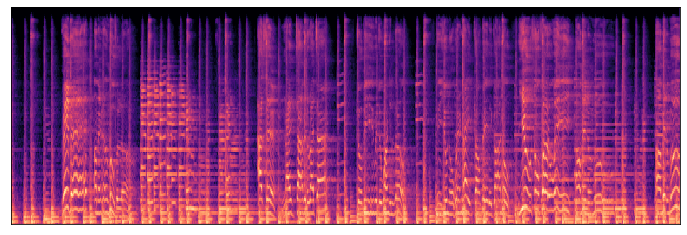

In [4]:
genre = 'blues'
filename = 'blues.00001.wav'
filepath = f'../gtzan/Data/genres_original/{genre}/{filename}'

# loading audio
y, sr = librosa.load(filepath)

#Mel Spectogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# convert to log scale (dB), using peak power (max) as reference
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))

# display spectogram on a mel scale
# sample rate and hop length parameters used to render time axis
librosa.display.specshow(log_S, sr=sr)#, x_axis='time', y_axis='mel')

plt.savefig('../gtzan/lib_images/lib_specgrams/blues_spec_example_3.png')


# Generate spectrograms and save to file

In [5]:
# # iterate through wav files, process spectrograms with librosa, save images to another directory: lib_specgrams
# for genre in genres:
#     for num in filenums:
#         filename_wav = genre+'.'+num 
        
#         filepath = f'../gtzan/Data/genres_original/{genre}/{filename_wav}'
# #        print(filepath)
#         print(f'{genre}{num[:-4]}_spec.png')
        
#         try:        
#             # loading audio
#             y, sr = librosa.load(filepath)

#             #Mel Spectogram
#             S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

#             # convert to log scale (dB), using peak power (max) as reference
#             log_S = librosa.power_to_db(S, ref=np.max)

#             plt.figure(figsize=(12,4))

#             # display spectogram on a mel scale
#             # sample rate and hop length parameters used to render time axis
#             librosa.display.specshow(log_S, sr=sr)#, x_axis='time', y_axis='mel')
            
#             # write to disk
#             plt.savefig(f'../gtzan/lib_images/lib_specgrams/{genre}{num[:-4]}_spec.png')

#         except:
#             continue

In [5]:
# populate images_dict with filename and accompanying np array, representing the associated image
images_dict = {}

# cycle through spectrograms, add to images_dict
for genre in genres:
    for num in filenums:
        filepath = f'../gtzan/lib_images/lib_specgrams/{genre}{num[:-4]}_spec.png'        
        
        try:
            images_dict[f'{genre}{num[:-4]}'] = io.imread(filepath)
        except:
            continue
            
# images_dict will have following fomat:
# {'hiphop00000': array([[[255, 255, 255, 255],
#          [255, 255, 255, 255],
#          [255, 255, 255, 255],
#          ...,
#          [255, 255, 255, 255],
#          [255, 255, 255, 255],
#          [255, 255, 255, 255]],

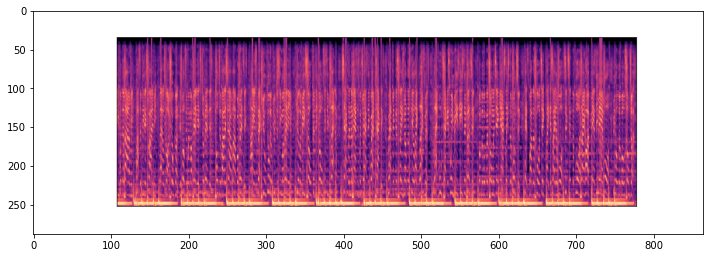

In [6]:
# each plot has a white border
fig, ax = plt.subplots(1,1, figsize=(12,12))
plt.imshow(images_dict['hiphop00001'])
plt.show()

In [7]:
# crop white borders out of each image and "standardize"
cropped_dict = {}

for genre in genres:
    for num in filenums:
        try: # jazz00054 was missing. Could be others too. And "standardize" (divide 255)
            cropped_dict[genre+num[:-4]] = images_dict[genre+num[:-4]][35:253,108:779] / 255
        except:
            continue
            
# cropped_dict will have following format:
#     {'hiphop00000': array([[[0.01176471, 0.00392157, 0.02745098, 1.        ],
#          [0.        , 0.        , 0.        , 1.        ],
#          [0.        , 0.        , 0.        , 1.        ],
#          ...,
#          [0.        , 0.        , 0.        , 1.        ],
#          [0.        , 0.        , 0.        , 1.        ],
#          [0.0745098 , 0.0745098 , 0.0745098 , 1.        ]],

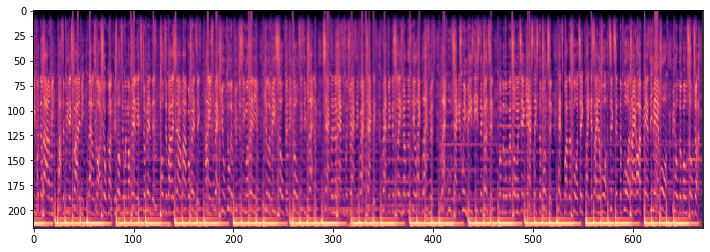

In [8]:
# white border cropped
fig, ax = plt.subplots(1,1, figsize=(12,12))
plt.imshow(cropped_dict['hiphop00001'])
plt.show()

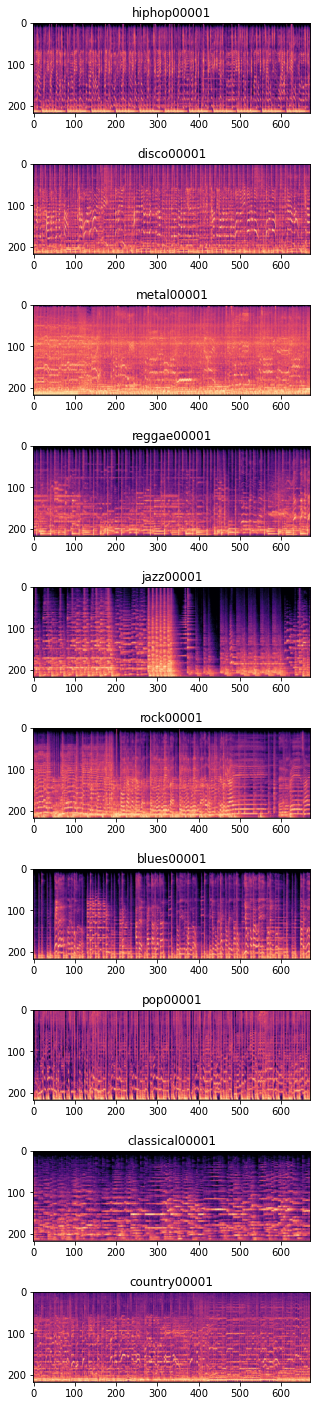

In [9]:
# spectrogram example for each genre
fig, ax = plt.subplots(10,1, figsize=(12,20))
plt.tight_layout(pad=3)

for i, genre in zip(range(10), genres):
    
    ax[i].imshow(cropped_dict[genre+'00001'])
    ax[i].set_title(genre+'00001')

plt.show()

In [10]:
print('Shape of one track array: ', cropped_dict['hiphop00000'].shape)
cropped_dict['hiphop00000']

Shape of one track array:  (218, 671, 4)


array([[[0.01176471, 0.00392157, 0.02745098, 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        ...,
        [0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.0745098 , 0.0745098 , 0.0745098 , 1.        ]],

       [[0.03529412, 0.01176471, 0.0745098 , 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        ...,
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.2       , 0.2       , 0.2       , 1.        ]],

       [[0.03529412, 0.01176471, 0.0745098 , 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.        , 0.01568627, 1.        ],
        ...,
        [0.        , 0.        , 0.01568627, 1.        ],
        [0.        , 0.      

grayscale shape:  (218, 671)


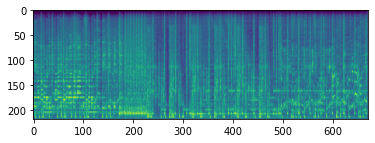

In [11]:
# grayscale
hiphop_gray = rgb2gray(cropped_dict['hiphop00000'])

print('grayscale shape: ', hiphop_gray.shape)

plt.imshow(hiphop_gray);

original spectrogram shape:  (218, 671, 4)


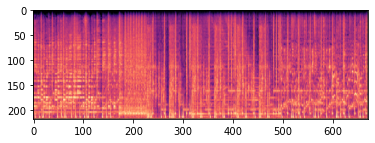

In [12]:
print('original spectrogram shape: ', cropped_dict['hiphop00000'].shape)

plt.imshow(cropped_dict['hiphop00000']);

In [13]:
gray_dict = {}

for genre in genres:
    for num in filenums:
        try:
            gray_dict[genre+num[:-4]] = rgb2gray(cropped_dict[genre+num[:-4]])
        except:
            continue

In [14]:
# print(rgb_dict['hiphop00000'].shape)
# plt.imshow(rgb_dict['hiphop00000'])

# df_flat dataframe

In [15]:
# flatten all 3D arrays (images) to 1D
flat_dict = {}

for key in gray_dict:
#     print(key+'_flat')
    flat_dict[key+'_flat'] = gray_dict[key].ravel() # .ravel(order='F') ??
    
df_flat = pd.DataFrame(flat_dict).T

print('df_flat shape: ', df_flat.shape)
display(df_flat.head(3))
display(df_flat.tail(3))

df_flat shape:  (992, 146278)


,0,1,2,3,4,5,6,7,8,9,...,146268,146269,146270,146271,146272,146273,146274,146275,146276,146277
hiphop00000_flat,0.007285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451
hiphop00001_flat,0.004770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451
hiphop00002_flat,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451


,0,1,2,3,4,5,6,7,8,9,...,146268,146269,146270,146271,146272,146273,146274,146275,146276,146277
country00097_flat,0.000565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451
country00098_flat,0.006169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451
country00099_flat,0.005053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451


In [16]:
# add column for label ('genre'), then slice filenumber off
df_flat['genre'] = df_flat.index
df_flat['genre'] = df_flat['genre'].apply(lambda x: x[:-10])

print('df_flat', df_flat.shape)
display(df_flat.head(3))

df_flat (992, 146279)


,0,1,2,3,4,5,6,7,8,9,...,146269,146270,146271,146272,146273,146274,146275,146276,146277,genre
hiphop00000_flat,0.007285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451,hiphop
hiphop00001_flat,0.004770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451,hiphop
hiphop00002_flat,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.07451,hiphop


# df_hog dataframe (HOG features)

In [17]:
# function to return hog features
def hog_features(image):
    image_hog = hog(
    image=image, pixels_per_cell=(9, 9),
    cells_per_block=(9,9),
    orientations=8,
    visualize=False,
    block_norm='L2-Hys', feature_vector=True)
    
    return image_hog

In [18]:
# populate dict for hog features
hog_dict = {}

for genre in genres:
    for num in filenums:
        try: # jazz00054 was missing. 
            hog_dict[genre+num[:-4]] = hog_features(cropped_dict[genre+num[:-4]])                
        except:
            continue

In [19]:
# create df with hog features
df_hog = pd.DataFrame(hog_dict).T

print('df_hog shape: ', df_hog.shape)
display(df_hog.head(3))
display(df_hog.tail(3))

df_hog shape:  (992, 684288)


,0,1,2,3,4,5,6,7,8,9,...,684278,684279,684280,684281,684282,684283,684284,684285,684286,684287
hiphop00000,0.006607,0.000000,0.007639,0.006299,0.038055,0.008454,0.001993,0.008037,0.039549,0.050731,...,0.013909,0.185492,0.124581,0.007784,0.002701,0.004841,0.014980,0.004854,0.026308,0.144700
hiphop00001,0.035539,0.006211,0.010480,0.000000,0.013620,0.000000,0.023980,0.014386,0.028260,0.024562,...,0.000000,0.000000,0.017511,0.005318,0.012752,0.050382,0.085226,0.009605,0.009224,0.025910
hiphop00002,0.003193,0.000000,0.000910,0.002445,0.004129,0.000000,0.000246,0.000000,0.009635,0.004920,...,0.013986,0.021844,0.046395,0.026990,0.006505,0.005748,0.012788,0.000857,0.031329,0.069638


,0,1,2,3,4,5,6,7,8,9,...,684278,684279,684280,684281,684282,684283,684284,684285,684286,684287
country00097,0.008298,0.003565,0.000928,0.002185,0.006365,0.000384,0.004804,0.000000,0.009604,0.000000,...,0.001308,0.000000,0.009487,0.010777,0.015479,0.064011,0.060546,0.010968,0.011296,0.007483
country00098,0.007253,0.000000,0.000000,0.000000,0.003084,0.000000,0.000000,0.001134,0.007003,0.000000,...,0.004909,0.000000,0.016912,0.026172,0.041092,0.083186,0.087252,0.040006,0.010458,0.029559
country00099,0.036077,0.000000,0.011488,0.004183,0.040936,0.027096,0.010465,0.009184,0.015427,0.016924,...,0.026432,0.108339,0.047018,0.032895,0.028101,0.012752,0.021217,0.012769,0.035961,0.099671


In [20]:
# add column for label ('genre'), then slice filenumber off
df_hog['genre'] = df_hog.index
df_hog['genre'] = df_hog['genre'].apply(lambda x: x[:-5])

print('df_hog shape: ', df_hog.shape)
display(df_hog.head(3))

df_hog shape:  (992, 684289)


,0,1,2,3,4,5,6,7,8,9,...,684279,684280,684281,684282,684283,684284,684285,684286,684287,genre
hiphop00000,0.006607,0.000000,0.007639,0.006299,0.038055,0.008454,0.001993,0.008037,0.039549,0.050731,...,0.185492,0.124581,0.007784,0.002701,0.004841,0.014980,0.004854,0.026308,0.144700,hiphop
hiphop00001,0.035539,0.006211,0.010480,0.000000,0.013620,0.000000,0.023980,0.014386,0.028260,0.024562,...,0.000000,0.017511,0.005318,0.012752,0.050382,0.085226,0.009605,0.009224,0.025910,hiphop
hiphop00002,0.003193,0.000000,0.000910,0.002445,0.004129,0.000000,0.000246,0.000000,0.009635,0.004920,...,0.021844,0.046395,0.026990,0.006505,0.005748,0.012788,0.000857,0.031329,0.069638,hiphop


# RFC (original)

In [31]:
# set target and features
X = df_flat.copy()
y = X.pop('genre')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1, shuffle=True)

# No standardisation as the data is already between 0 (black) and 1 (full colour -RGB- or intensity)

# Baseline
print('Baseline:')
y_train.value_counts(normalize=True)

Baseline:


rock         0.100883
disco        0.100883
classical    0.100883
metal        0.100883
reggae       0.100883
blues        0.100883
pop          0.100883
country      0.100883
jazz         0.099622
hiphop       0.093317
Name: genre, dtype: float64

In [36]:
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators':[100,200,500,1000], 
    'criterion':['gini', 'entropy'],
    'max_depth':[10,20,30,50,100,None],
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features='auto',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
    'n_jobs':[2],
    'random_state':[1],
    'verbose':[10],
#     warm_start=False,
    'class_weight':['balanced'],
#     ccp_alpha=0.0,
#     max_samples=None,
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-2, cv=5, verbose=10)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-2)]: Done  47 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-2)]: Done  84 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-2)]: Done  99 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-2)]: Done 131 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-2)]: Done 148 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-2)]: Done 167 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed: 34

building tree 1 of 500building tree 2 of 500

building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.3s


building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.7s


building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.0s


building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    1.4s


building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    1.8s


building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.3s


building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.8s


building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    3.5s


building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    4.0s


building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    4.8s


building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500
building tree 95 of 500
building tree 96 of 500


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    5.5s


building tree 97 of 500
building tree 98 of 500
building tree 99 of 500
building tree 100 of 500
building tree 101 of 500
building tree 102 of 500
building tree 103 of 500
building tree 104 of 500
building tree 105 of 500
building tree 106 of 500
building tree 107 of 500
building tree 108 of 500
building tree 109 of 500
building tree 110 of 500
building tree 111 of 500
building tree 112 of 500


[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    6.3s


building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500


[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    7.2s


building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500


[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:    8.1s


building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    9.0s


building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500


[Parallel(n_jobs=2)]: Done 177 tasks      | elapsed:   10.1s


building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   11.1s



building tree 203 of 500
building tree 204 of 500
building tree 205 of 500
building tree 206 of 500
building tree 207 of 500
building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500
building tree 212 of 500
building tree 213 of 500
building tree 214 of 500
building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500

[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:   12.3s



building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500
building tree 231 of 500
building tree 232 of 500
building tree 233 of 500
building tree 234 of 500
building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500


[Parallel(n_jobs=2)]: Done 238 tasks      | elapsed:   13.5s


building tree 242 of 500
building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500
building tree 250 of 500
building tree 251 of 500
building tree 252 of 500
building tree 253 of 500
building tree 254 of 500
building tree 255 of 500
building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500


[Parallel(n_jobs=2)]: Done 261 tasks      | elapsed:   14.8s


building tree 266 of 500
building tree 267 of 500
building tree 268 of 500
building tree 269 of 500
building tree 270 of 500
building tree 271 of 500
building tree 272 of 500
building tree 273 of 500
building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500

[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:   16.1s



building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500


[Parallel(n_jobs=2)]: Done 309 tasks      | elapsed:   17.4s


building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500


[Parallel(n_jobs=2)]: Done 334 tasks      | elapsed:   18.8s


building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500


[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   20.3s


building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500


[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   21.8s


building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500


[Parallel(n_jobs=2)]: Done 417 tasks      | elapsed:   23.4s


building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   25.0s


building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500
building tree 468 of 500
building tree 469 of 500
building tree 470 of 500
building tree 471 of 500
building tree 472 of 500
building tree 473 of 500
building tree 474 of 500
building tree 475 of 500
building tree 476 of 500
building tree 477 of 500
building tree 478 of 500
building tree 479 of 500
building tree 480 of 500


[Parallel(n_jobs=2)]: Done 477 tasks      | elapsed:   26.7s


building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500
building tree 486 of 500
building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500
building tree 491 of 500
building tree 492 of 500
building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   27.9s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 50, 100, None],
                         'n_estimators': [100, 200, 500, 1000], 'n_jobs': [2],
                         'random_state': [1], 'verbose': [10]},
             verbose=10)

In [37]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 500,
 'n_jobs': 2,
 'random_state': 1,
 'verbose': 10}

In [38]:
print('train score:\t', grid.score(X_train, y_train))
print('cv mean:\t', grid.best_score_)
print('test score:\t', grid.score(X_test, y_test))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:    0.0s
[Para

train score:	 0.9987484355444305
cv mean:	 0.4843396226415094
test score:	 0.48


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:    0.0s
[Para

In [39]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 500,
 'n_jobs': 2,
 'random_state': 1,
 'verbose': 10}

In [40]:
rfc = RandomForestClassifier(n_estimators=500, 
                             class_weight='balanced',
                             criterion='gini', 
                             max_depth=10, 
                             n_jobs=-2, 
                             random_state=1)

rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=500,
                       n_jobs=-2, random_state=1)

In [42]:
print('train score:\t', rfc.score(X_train, y_train))
print('cv mean:\t', cross_val_score(rfc, X_train, y_train, cv=5).mean())
print('test score:\t', rfc.score(X_test, y_test))

train score:	 0.9987484355444305
cv mean:	 0.4843396226415094
test score:	 0.48


In [67]:
featimp = rfc.feature_importances_
featimp

array([1.58287237e-05, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [68]:
# reshape into image array dimensions
importances_2d = rfc.feature_importances_.reshape(gray_dict['hiphop00000'].shape[0], 
                                 gray_dict['hiphop00000'].shape[1])

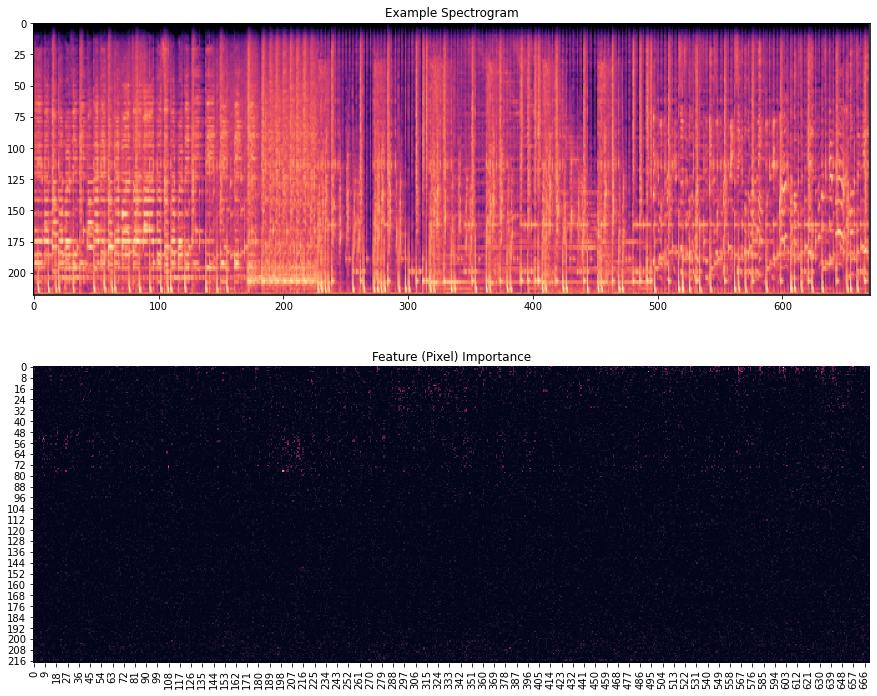

In [69]:
fig, ax = plt.subplots(2,1, figsize=(15,12))
ax[0].imshow(cropped_dict['hiphop00000'])
sns.heatmap(importances_2d, ax=ax[1], cbar=False)

ax[0].set_title('Example Spectrogram')
ax[1].set_title('Feature (Pixel) Importance')
plt.show()

In [39]:
# reshape into RGB array
importances_3d = rfc.feature_importances_.reshape(gray_dict['hiphop00000'].shape[0], 
                                 gray_dict['hiphop00000'].shape[1])

# importances = rfc.feature_importances_.reshape(cropped_dict['hiphop00000'].shape[0], 
#                                  cropped_dict['hiphop00000'].shape[1], 
#                                  cropped_dict['hiphop00000'].shape[2])

print(importances_3d.shape)
print(importances_3d.min(), importances_3d.max())

importances_3d[:2]

(218, 671)
0.0 0.0004438985622209837


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.39090767e-06, 7.78983371e-05, 0.00000000e+00],
       [0.00000000e+00, 2.93280855e-20, 0.00000000e+00, ...,
        9.93679744e-05, 0.00000000e+00, 0.00000000e+00]])

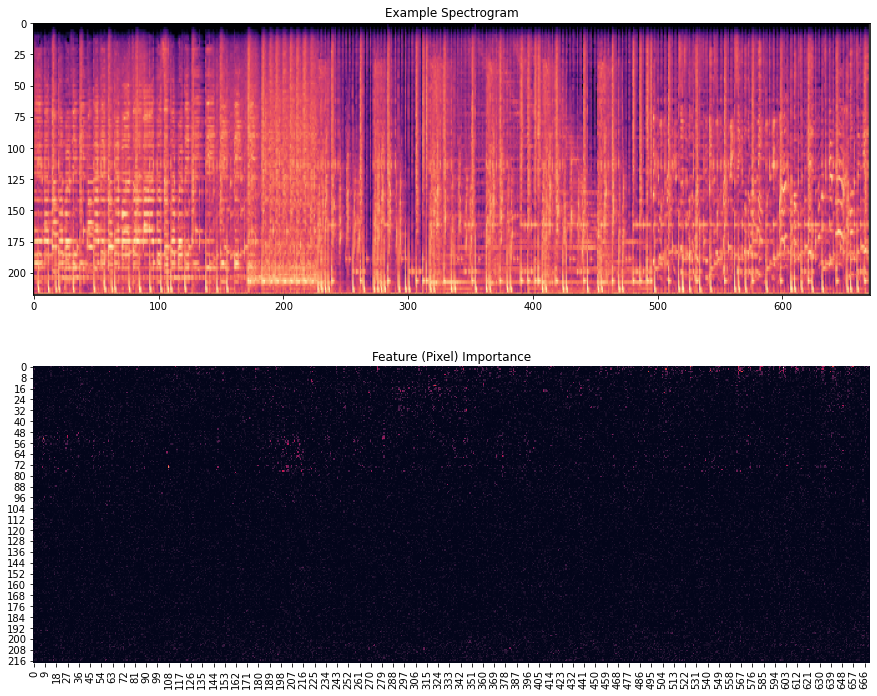

In [58]:
fig, ax = plt.subplots(2,1, figsize=(15,12))
ax[0].imshow(cropped_dict['hiphop00000'])
sns.heatmap(importances_3d, ax=ax[1], cbar=False)

ax[0].set_title('Example Spectrogram')
ax[1].set_title('Feature (Pixel) Importance')
plt.show()

# RFC (PCA on original pixel features, ie. PC of df_flat)

In [33]:
# set target and features
X = df_flat.copy()
y = X.pop('genre')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1, shuffle=True)

# No standardisation as the data is already between 0 (black) and 1 (full colour -RGB- or intensity)

In [34]:
# PCA (n_components: 0.99999999)
n_components = 0.99999999
pca = PCA(n_components=n_components, random_state=1, svd_solver='full')
X_train_pc = pd.DataFrame(pca.fit_transform(X_train), 
                         columns=[f'PC_{i+1}' for i in range(pca.n_components_)], index=X_train.index)

X_test_pc = pd.DataFrame(pca.transform(X_test), 
                         columns=[f'PC_{i+1}' for i in range(pca.n_components_)], index=X_test.index)

display(X_train_pc.head(3))
print('PCA explained variance ratio cumulative sum:')
print('Length: ', len(pca.explained_variance_ratio_.cumsum()))
print()
print(pca.explained_variance_ratio_.cumsum()[:20])
print('...')
print(pca.explained_variance_ratio_.cumsum()[-20:])

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_774,PC_775,PC_776,PC_777,PC_778,PC_779,PC_780,PC_781,PC_782,PC_783
jazz00095_flat,19.080019,1.619820,-7.404407,0.686169,0.443786,-1.582492,1.507421,-3.587668,2.711190,0.828755,...,-0.067420,0.065188,-0.064691,-0.013185,-0.002946,-0.004478,-0.001069,-0.001500,0.000127,-0.000196
country00045_flat,-19.033321,6.609608,9.080805,-8.902595,2.050531,1.507817,-1.071601,0.574167,-4.184766,-2.109132,...,-0.118395,-0.100414,-0.040880,0.019937,0.003764,0.001964,-0.000393,0.001592,0.000542,-0.000146
jazz00094_flat,51.266047,-2.750803,-4.418295,3.056151,-2.166482,-2.084660,0.678033,-0.868382,1.651072,4.622808,...,-0.064238,-0.016417,0.074515,-0.008968,-0.002935,-0.000120,-0.000346,0.000267,-0.000323,0.000414


PCA explained variance ratio cumulative sum:
Length:  783

[0.29371586 0.34051586 0.36334056 0.38243086 0.39908408 0.40904505
 0.41856096 0.42557908 0.43186492 0.43741123 0.44291184 0.44799153
 0.45264626 0.45715198 0.46155363 0.46550603 0.46902195 0.47239761
 0.47567257 0.47879311]
...
[0.99765456 0.99788155 0.99810673 0.99833137 0.99855215 0.99877074
 0.99898469 0.99918696 0.99938804 0.99957785 0.99973976 0.99985926
 0.99993123 0.99998225 0.99998896 0.99999287 0.99999591 0.9999979
 0.99999938 1.        ]


X_train_pc shape: (793, 783)


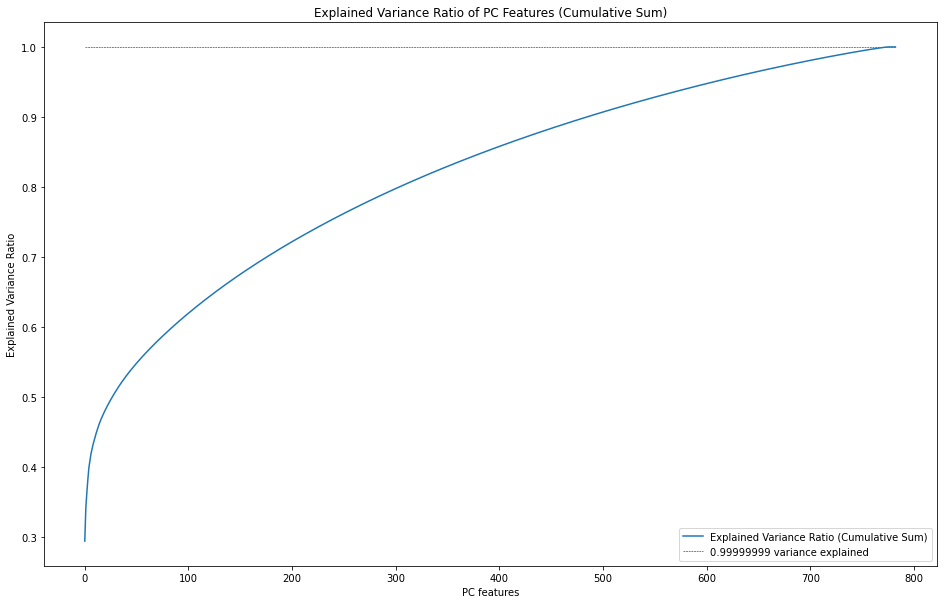

In [35]:
print('X_train_pc shape:', X_train_pc.shape)

fig, ax = plt.subplots(1,1, figsize=(16,10))

# plot explained variance ratio cumulative sum of principle components
plt.plot(pca.explained_variance_ratio_.cumsum(), label='Explained Variance Ratio (Cumulative Sum)')

# plot horizontal line at required explained variance, ie n_components = 0.99999999
plt.hlines(y=n_components, xmin=0, xmax=len(pca.explained_variance_ratio_), colors='k', linestyles='dashed', lw=0.5, label=f'{n_components} variance explained', data=None)
plt.legend(loc='lower right')
plt.xlabel('PC features')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of PC Features (Cumulative Sum)')
plt.show()

In [38]:
# RFC on PC of flattened array
rfc = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)

rfc.fit(X_train_pc, y_train)

print('RFC (PC on original features)')
print()
print('Train score:\t', rfc.score(X_train_pc, y_train))
print('CV mean:\t', cross_val_score(rfc, X_train_pc, y_train, cv=5).mean())
print('Test score:\t', rfc.score(X_test_pc, y_test))

RFC (PC on original features)

Train score:	 0.9987389659520807
CV mean:	 0.37454024361117744
Test score:	 0.2864321608040201


# RFC (PCA on hog features, ie. PC of df_hog)

In [21]:
# set target and features
X = df_hog.copy()
y = X.pop('genre')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1, shuffle=True)

# No standardisation as the data is already between 0 (black) and 1 (full colour -RGB- or intensity)

In [22]:
# PCA (n_components: 0.99999999)
n_components = 0.99999999
pca = PCA(n_components=n_components, random_state=1, svd_solver='full')
X_train_pc = pd.DataFrame(pca.fit_transform(X_train), 
                         columns=[f'PC_{i+1}' for i in range(pca.n_components_)], index=X_train.index)

X_test_pc = pd.DataFrame(pca.transform(X_test), 
                         columns=[f'PC_{i+1}' for i in range(pca.n_components_)], index=X_test.index)

display(X_train_pc.head(3))
print('PCA explained variance ratio cumulative sum:')
print('Length: ', len(pca.explained_variance_ratio_.cumsum()))
print()
print(pca.explained_variance_ratio_.cumsum()[:20])
print('...')
print(pca.explained_variance_ratio_.cumsum()[-20:])

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_774,PC_775,PC_776,PC_777,PC_778,PC_779,PC_780,PC_781,PC_782,PC_783
jazz00095,8.999451,0.587002,-1.242126,-0.394557,0.746851,-2.083379,2.576798,0.226780,-2.429897,-1.948783,...,0.081259,0.072459,-0.033894,0.027139,-0.004184,-0.006995,-0.005706,-0.001706,0.002566,-0.000952
country00045,-0.667889,0.709979,2.567480,0.933177,1.196294,0.388347,-1.494077,0.540397,2.816974,1.238848,...,0.079430,0.092813,0.062928,-0.006659,-0.010436,0.002818,0.001352,-0.000415,-0.002772,-0.000938
jazz00094,4.134815,-4.704806,1.328462,-0.997454,-1.753015,0.274727,1.363126,-2.449180,-3.186898,-0.852846,...,-0.078698,-0.042684,-0.033239,-0.039732,-0.002828,0.004759,0.002356,0.003240,-0.002726,0.004157


PCA explained variance ratio cumulative sum:
Length:  783

[0.18711826 0.20674978 0.22548709 0.23506776 0.24361015 0.25021349
 0.25583788 0.26108425 0.26618022 0.27120778 0.2760667  0.28086998
 0.2855184  0.29010577 0.29458428 0.29897825 0.30329174 0.30752412
 0.31166962 0.31577048]
...
[0.99678503 0.99706905 0.99735167 0.99763133 0.99790647 0.99817623
 0.99844011 0.99869415 0.99894512 0.99917519 0.99940152 0.99957434
 0.99974363 0.99990002 0.9999273  0.99994945 0.99996755 0.99998015
 0.99999043 1.        ]


X_train_pc shape: (793, 783)


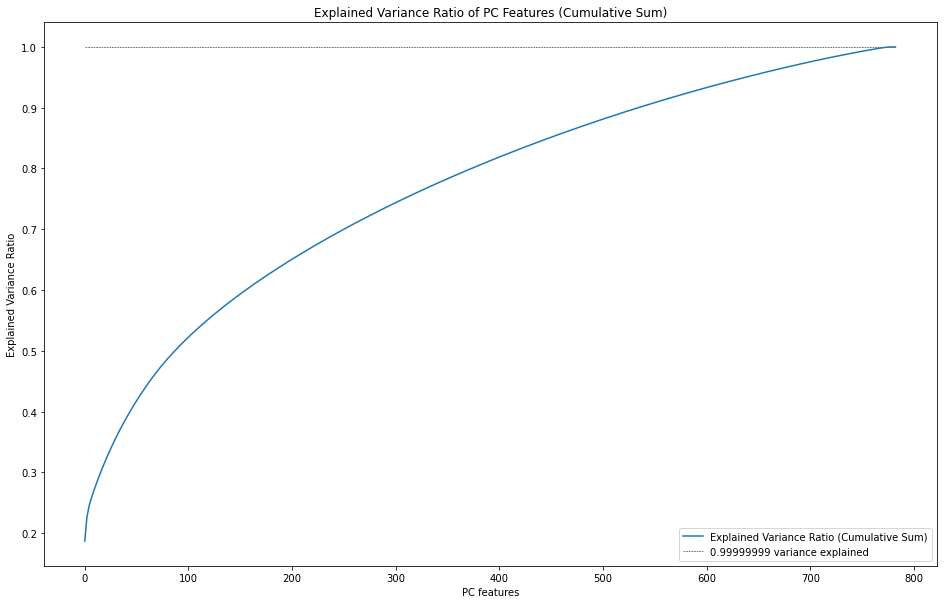

In [23]:
print('X_train_pc shape:', X_train_pc.shape)

fig, ax = plt.subplots(1,1, figsize=(16,10))

# plot explained variance ratio cumulative sum of principle components
plt.plot(pca.explained_variance_ratio_.cumsum(), label='Explained Variance Ratio (Cumulative Sum)')

# plot horizontal line at required explained variance, ie n_components = 0.99999999
plt.hlines(y=n_components, xmin=0, xmax=len(pca.explained_variance_ratio_), colors='k', linestyles='dashed', lw=0.5, label=f'{n_components} variance explained', data=None)
plt.legend(loc='lower right')
plt.xlabel('PC features')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of PC Features (Cumulative Sum)')
plt.show()

In [24]:
# RFC on PC of hog features
rfc = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)

rfc.fit(X_train_pc, y_train)

print('RFC (PC on HOG features)')
print()
print('Train score:\t', rfc.score(X_train_pc, y_train))
print('CV mean:\t', cross_val_score(rfc, X_train_pc, y_train, cv=5).mean())
print('Test score:\t', rfc.score(X_test_pc, y_test))

RFC (PC on HOG features)

Train score:	 0.9987389659520807
CV mean:	 0.37702412228325766
Test score:	 0.3065326633165829
